# Geospatial distribution of total cases
Total number of cases grouped by province in the latest available day, only for provinces in the north-eastern part of Italy

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyprojroot import here
from src.data.read_dataset import get_processed_dataset
from src.visualization import visualize

prov_df = get_processed_dataset('dpc_province')
italy = gpd.read_file('../../data/raw/prov2019.geojson')

In [2]:
def label_coords(coords):
    c1, c2 = coords
    return (c1, c2*0.9985)

def draw_geospatial_distribution(date, regions=[5, 6], save_to_file=None):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    vmax = max(prov_df[prov_df.codice_regione.isin(regions)].totale_casi)
    selected_day = prov_df[prov_df.data == date]
    italy_merged = italy.merge(selected_day, how = 'left', left_on = 'COD_PROV', right_on = 'codice_provincia')
    italy_merged = italy_merged[italy_merged.COD_REG.isin(regions)]
    italy_merged.plot(ax=ax, column='totale_casi', cmap='OrRd', legend=True, legend_kwds={'label': "Number of cases", 'orientation': "horizontal"}, vmin=0, vmax=vmax)
    italy_merged.apply(lambda x: ax.annotate(s=f'{x.SIGLA}\n({int(x.totale_casi)})', xy=label_coords(x.geometry.centroid.coords[0]), ha='center'),axis=1);
    ax.set_axis_off()
    ax.text(0, 1.1, 'Total number of COVID-19 cases by province',
            transform=ax.transAxes, size=16, weight=600, ha='left')
    ax.text(1, 0, str(date)[:10], transform=ax.transAxes, ha='right', size=14,
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    if save_to_file:
        fig.savefig(save_to_file, dpi=150)
    


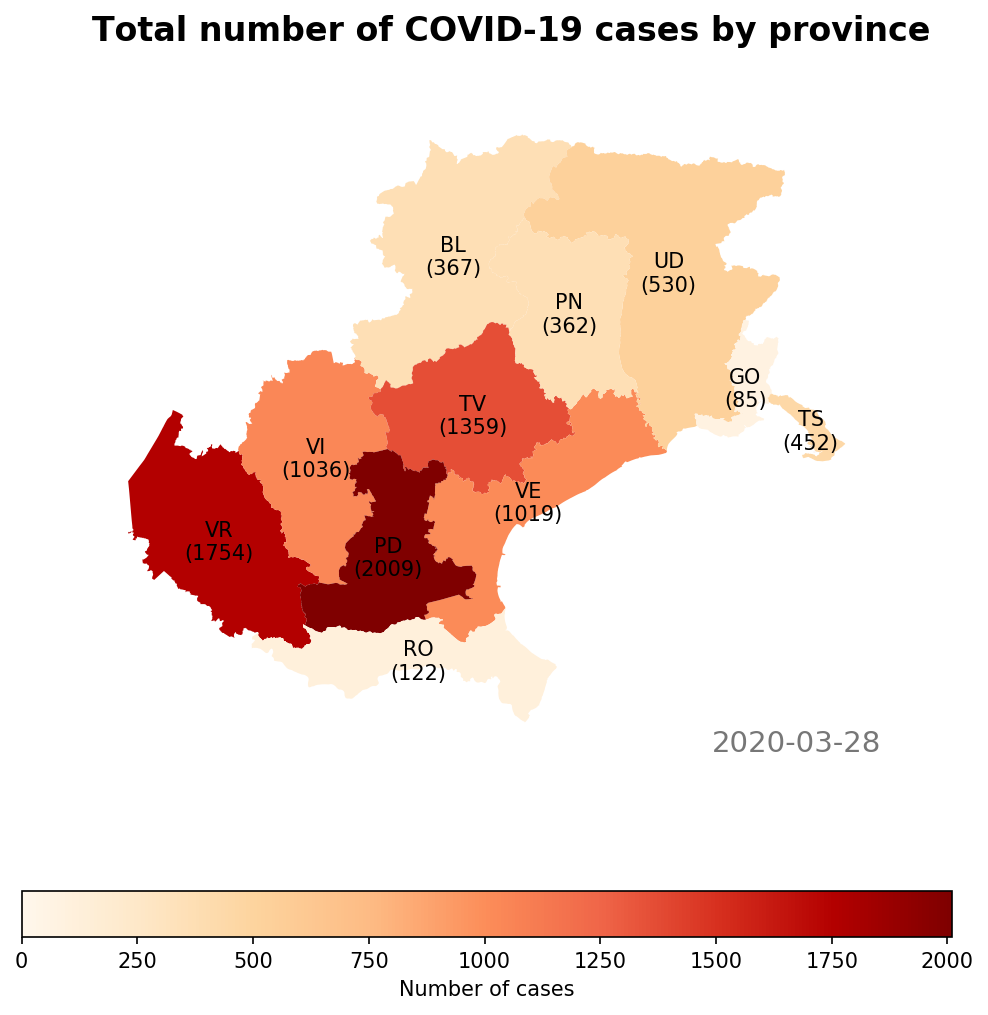

In [3]:
draw_geospatial_distribution(max(prov_df.data))

<ipython-input-2-f4a24aebde1d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(8, 8))
<ipython-input-2-f4a24aebde1d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(8, 8))
<ipython-input-2-f4a24aebde1d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f

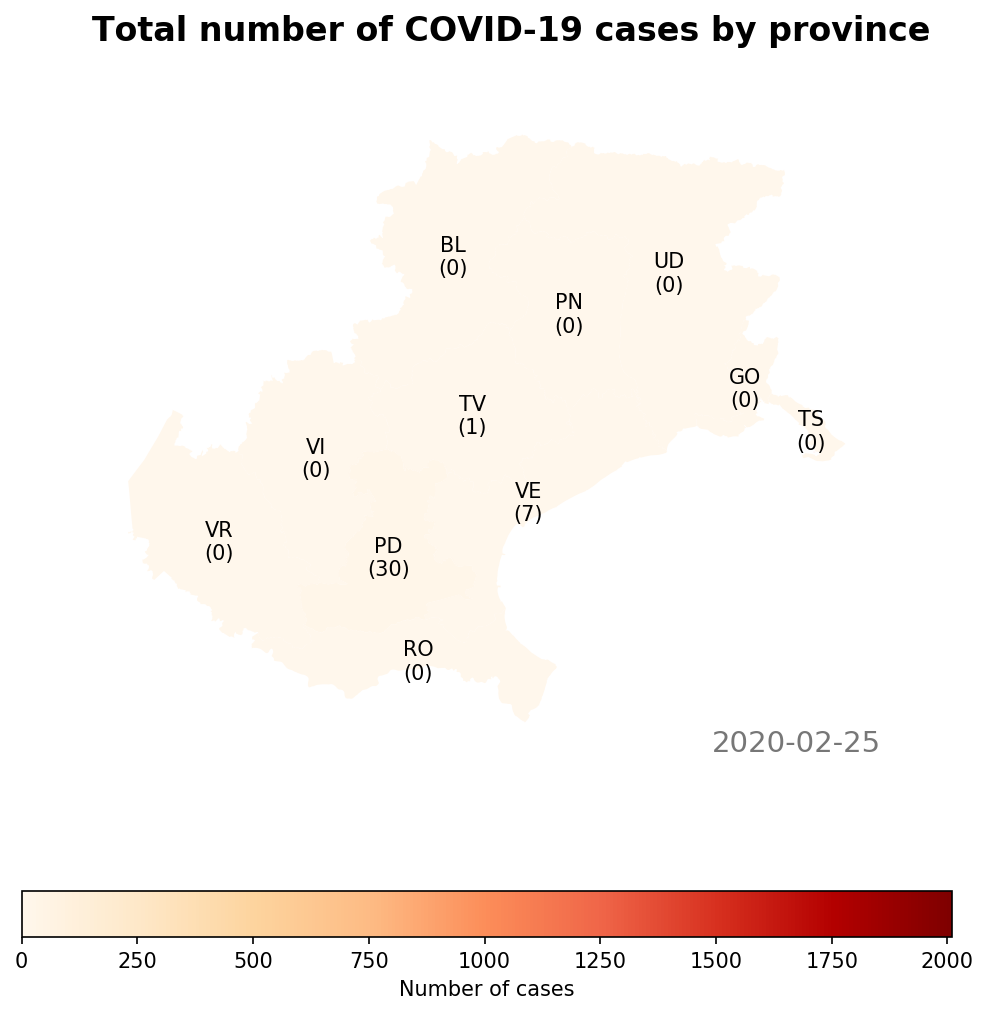

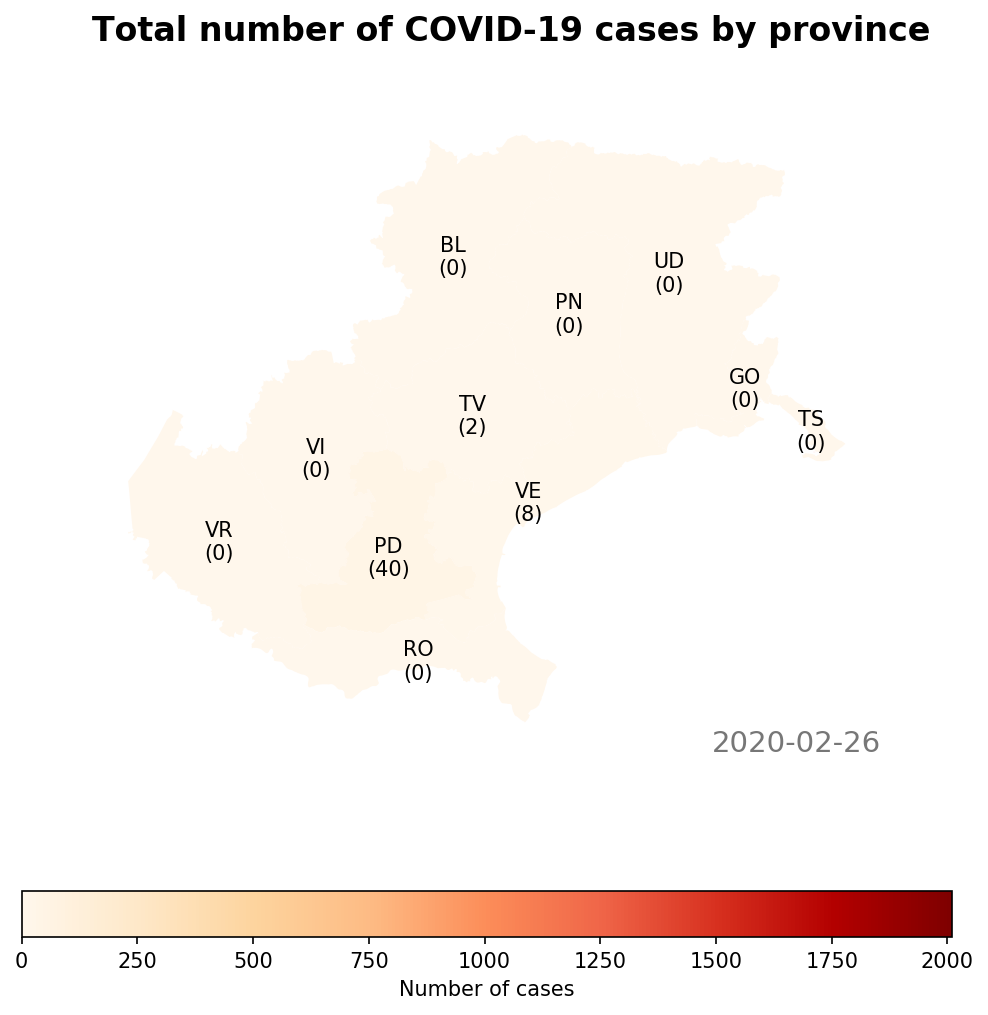

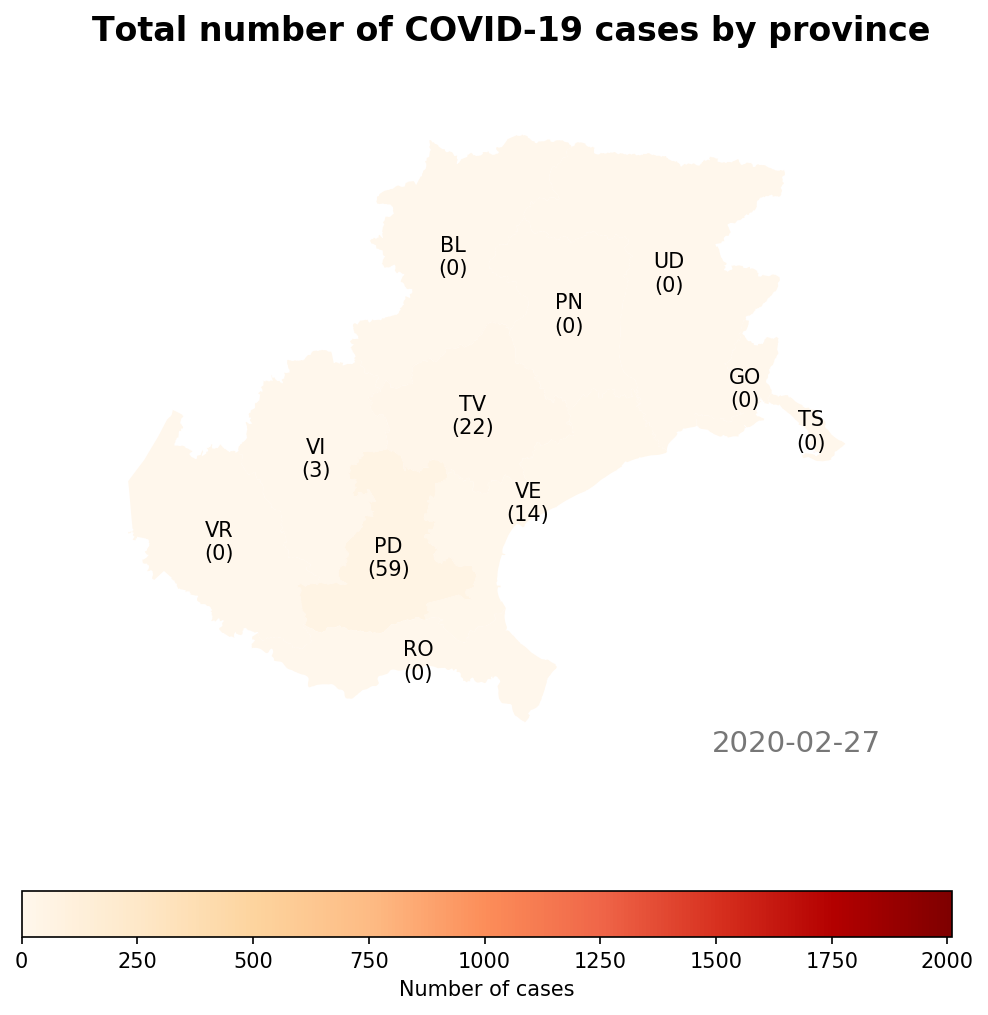

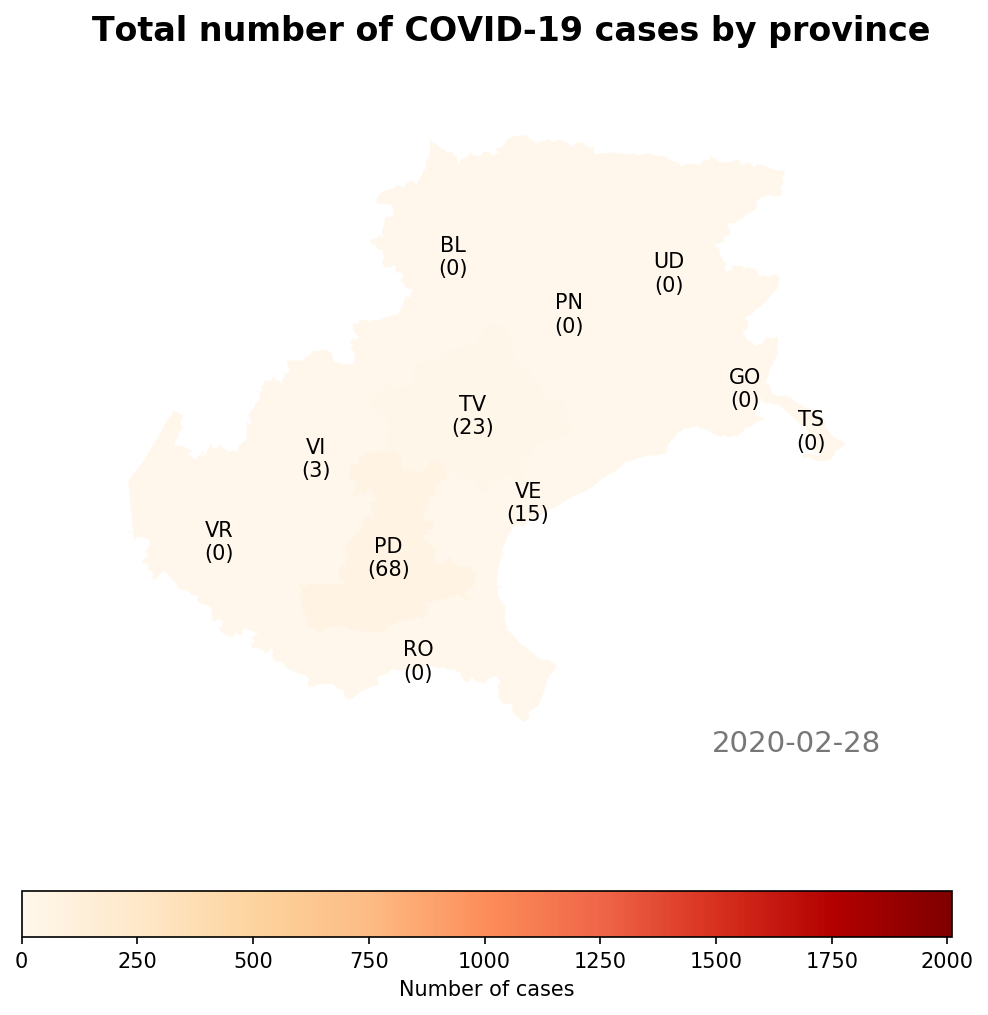

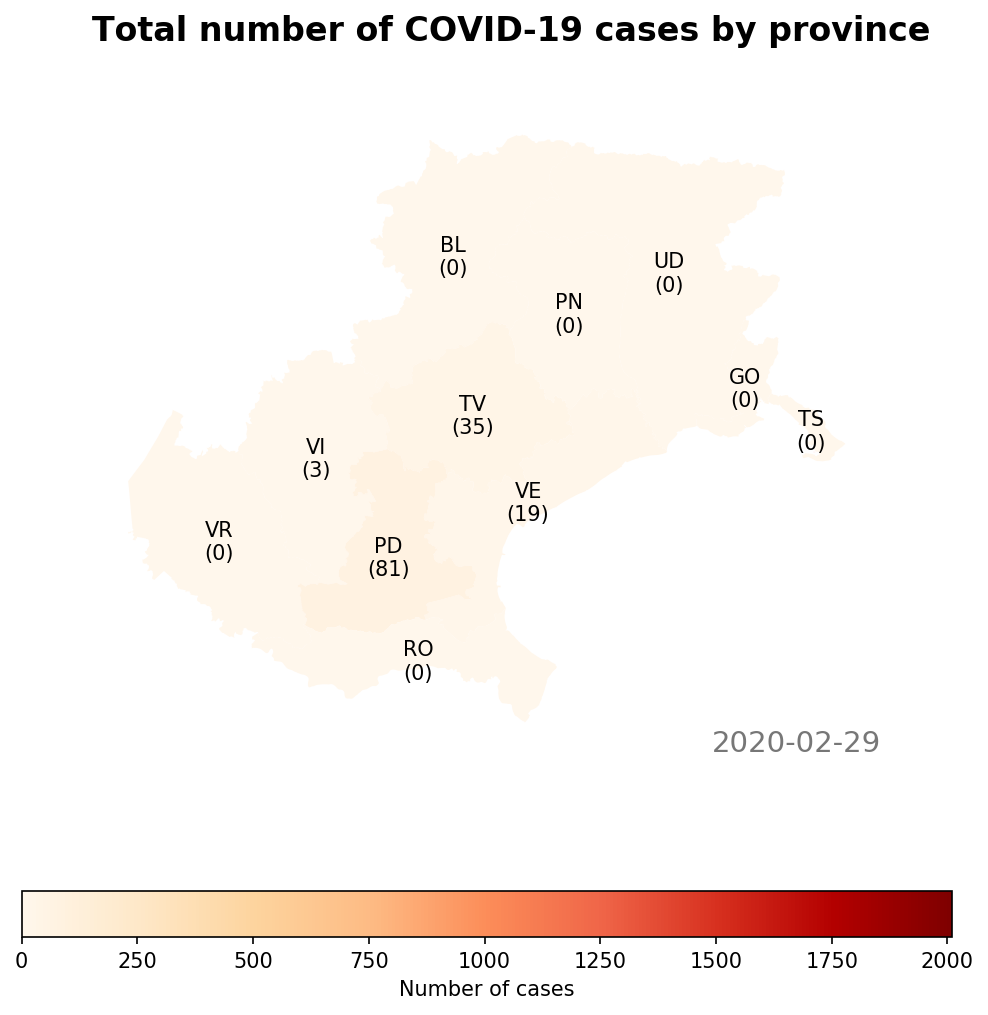

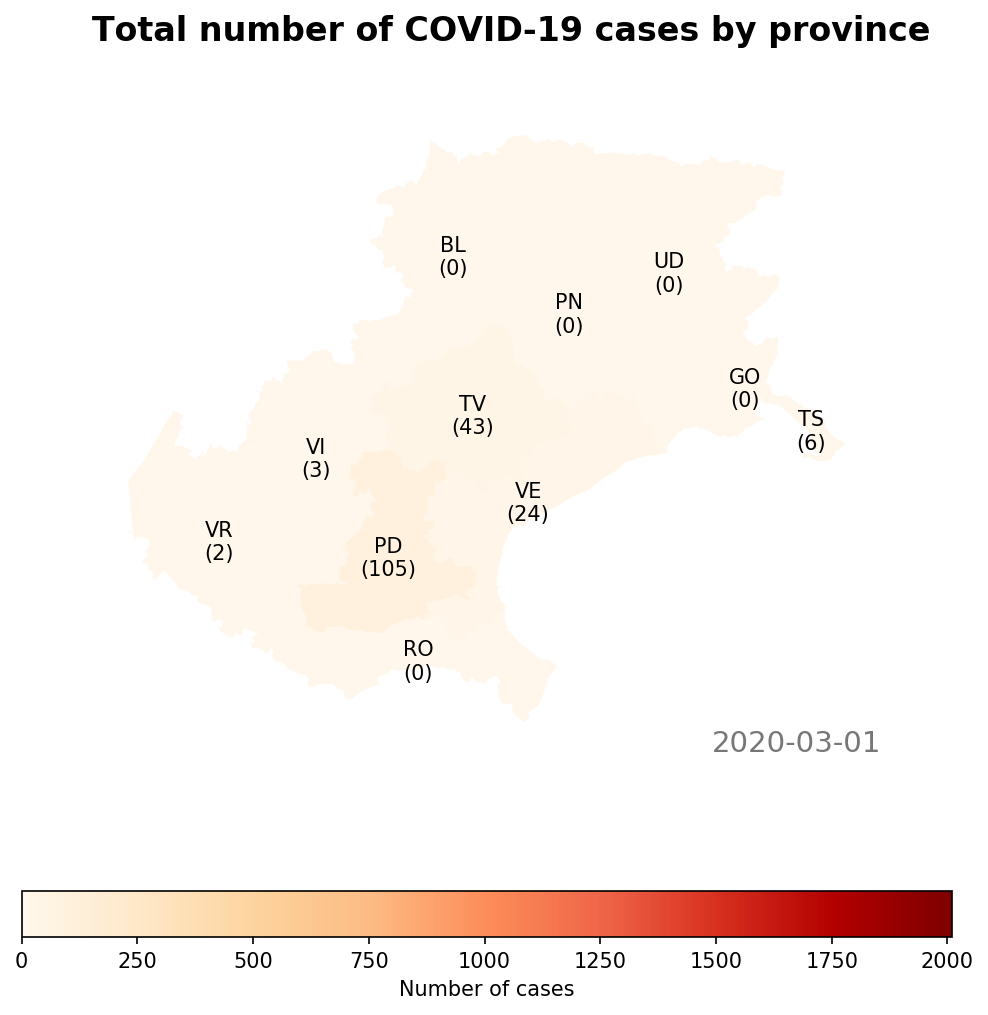

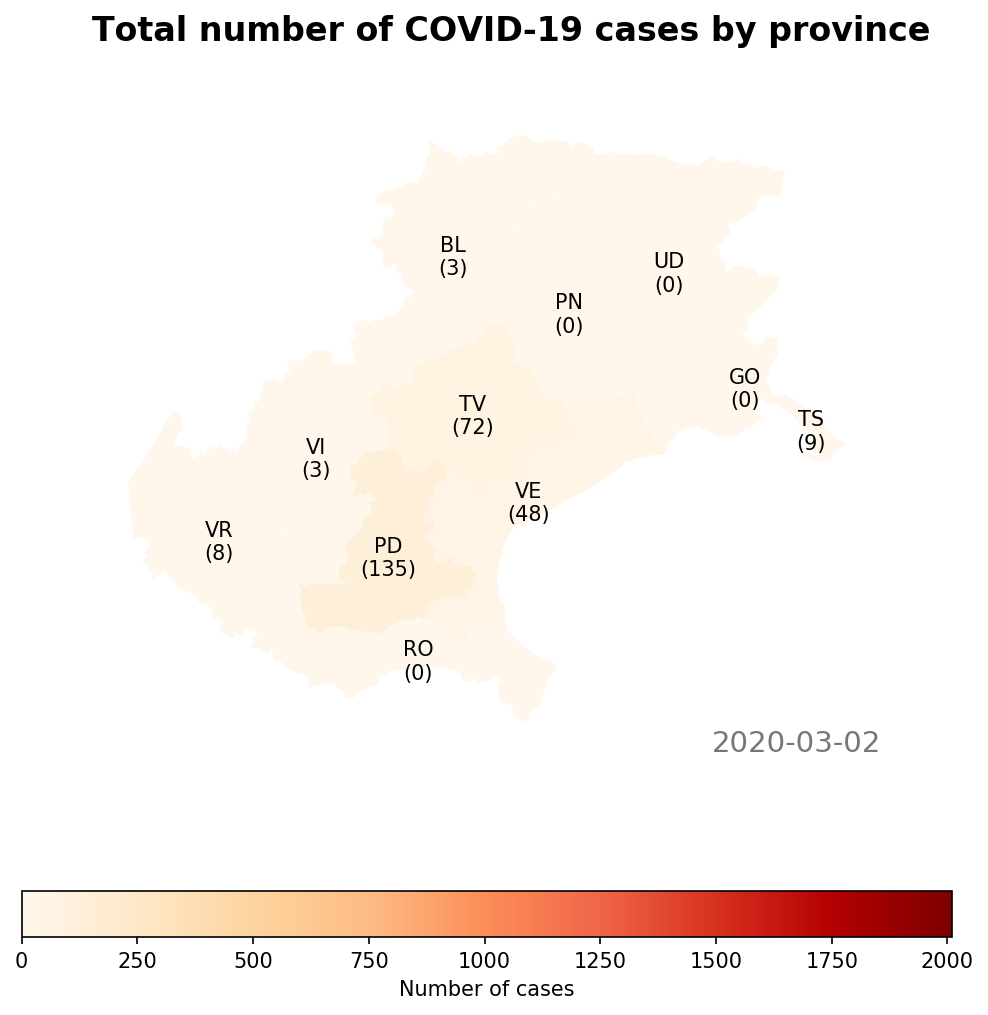

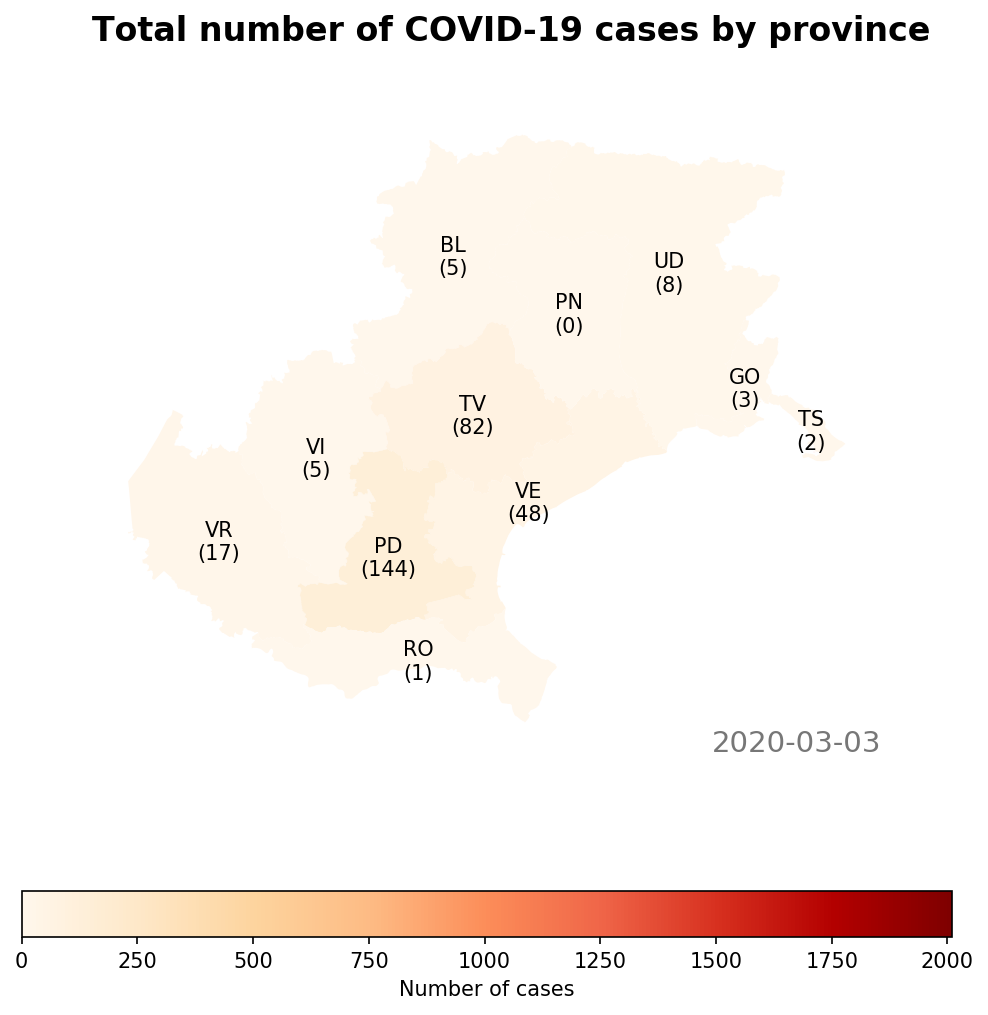

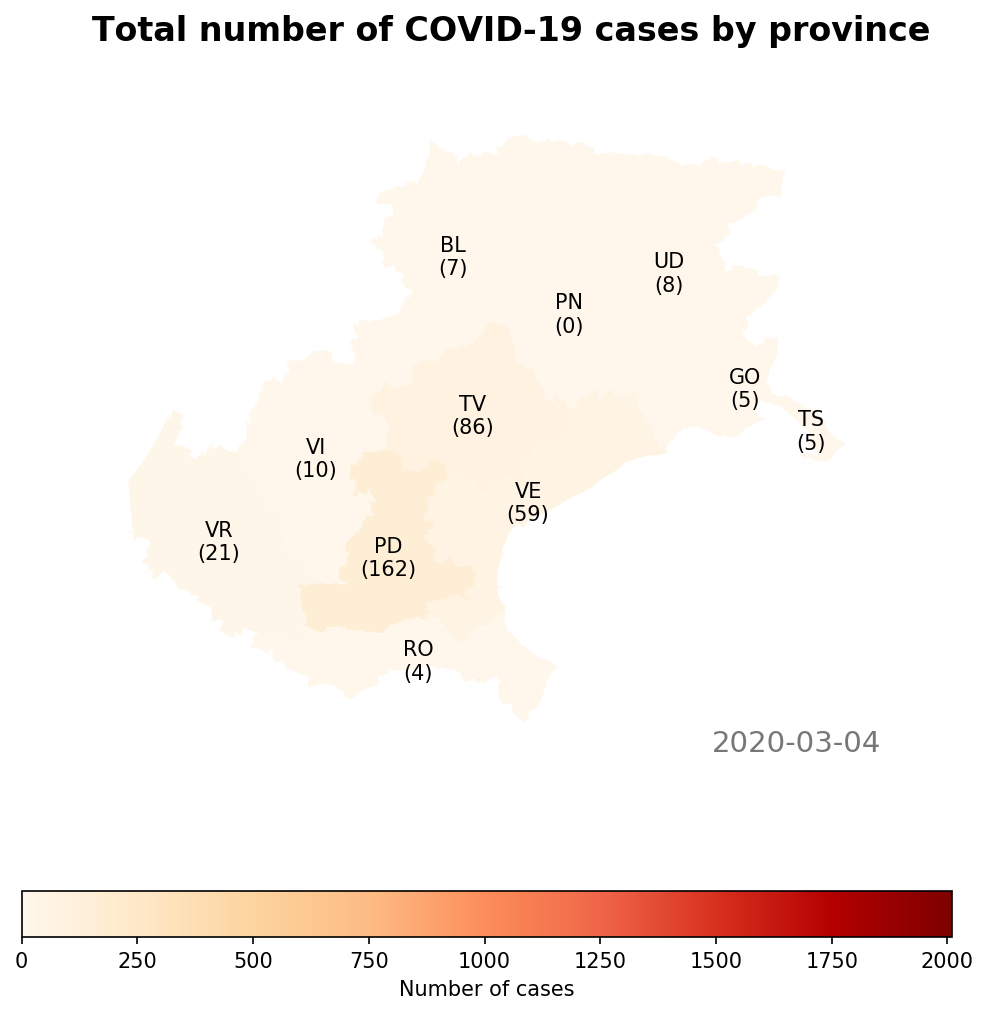

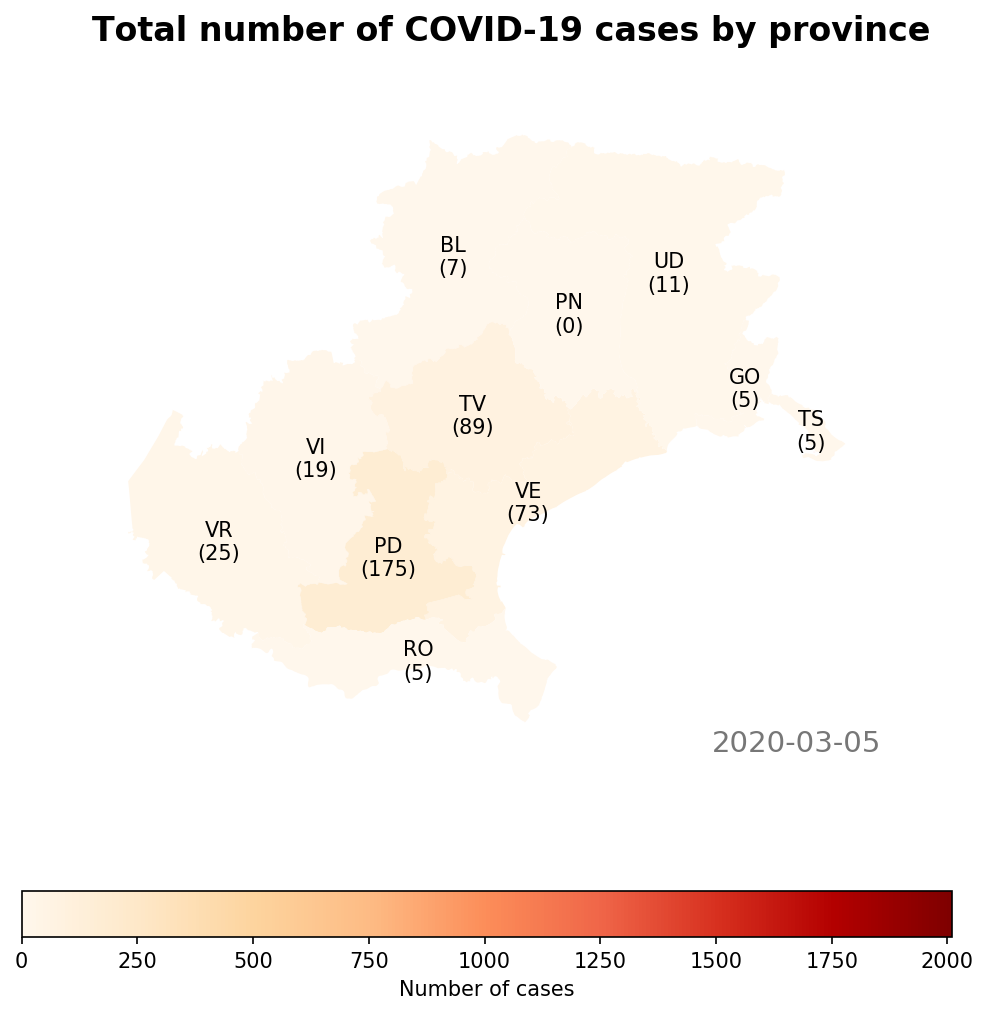

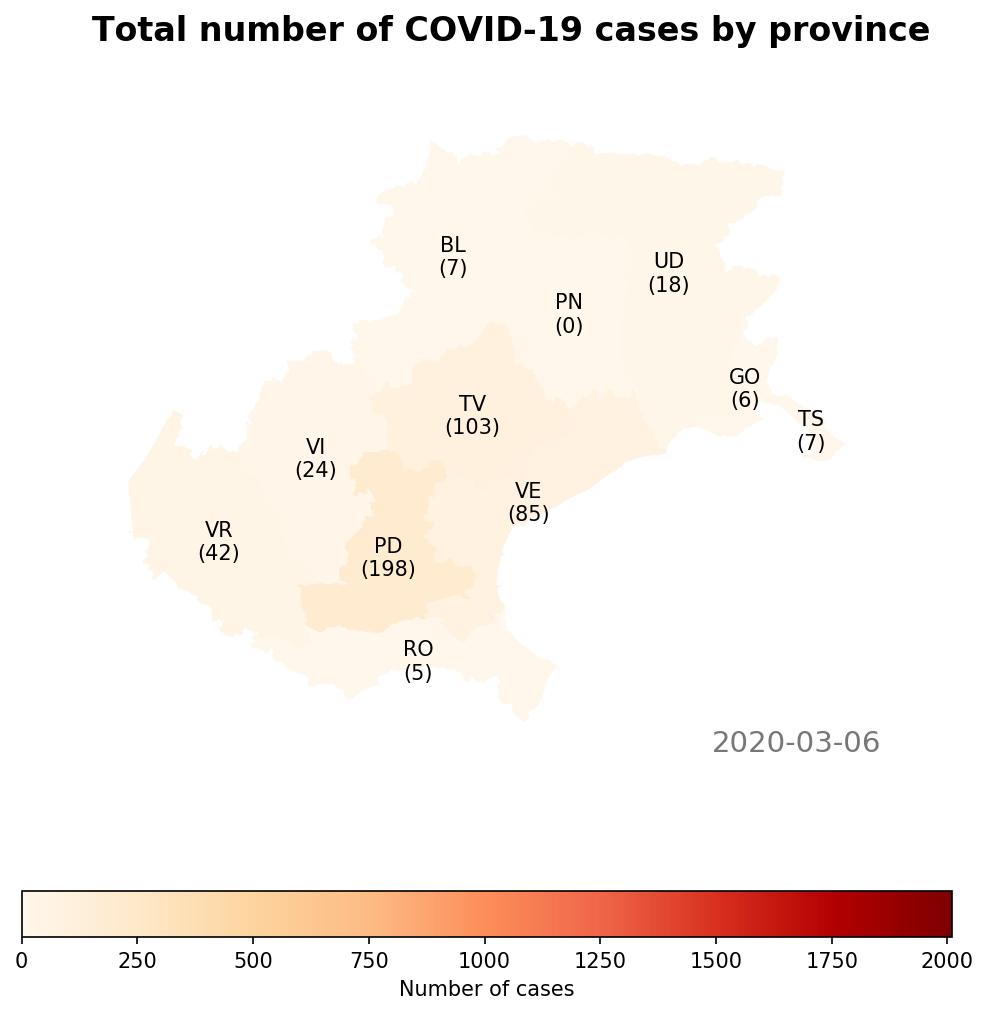

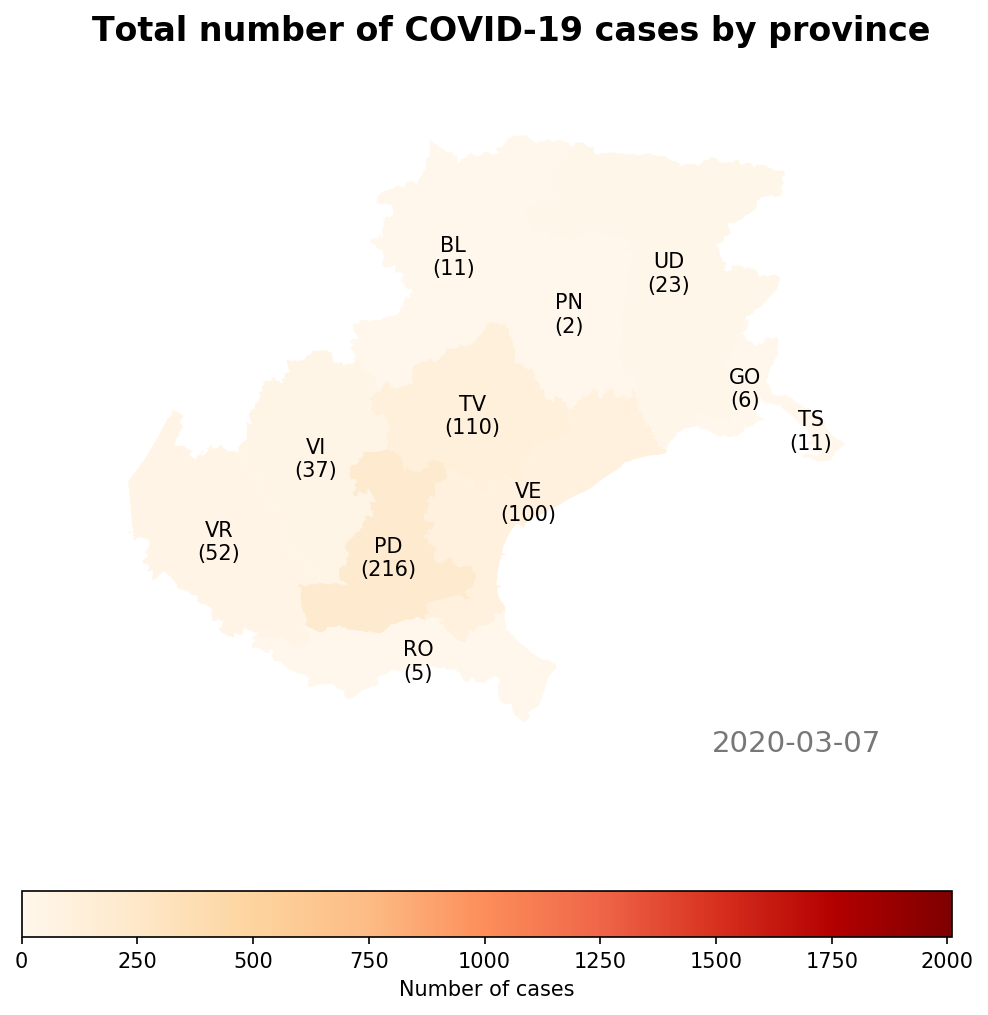

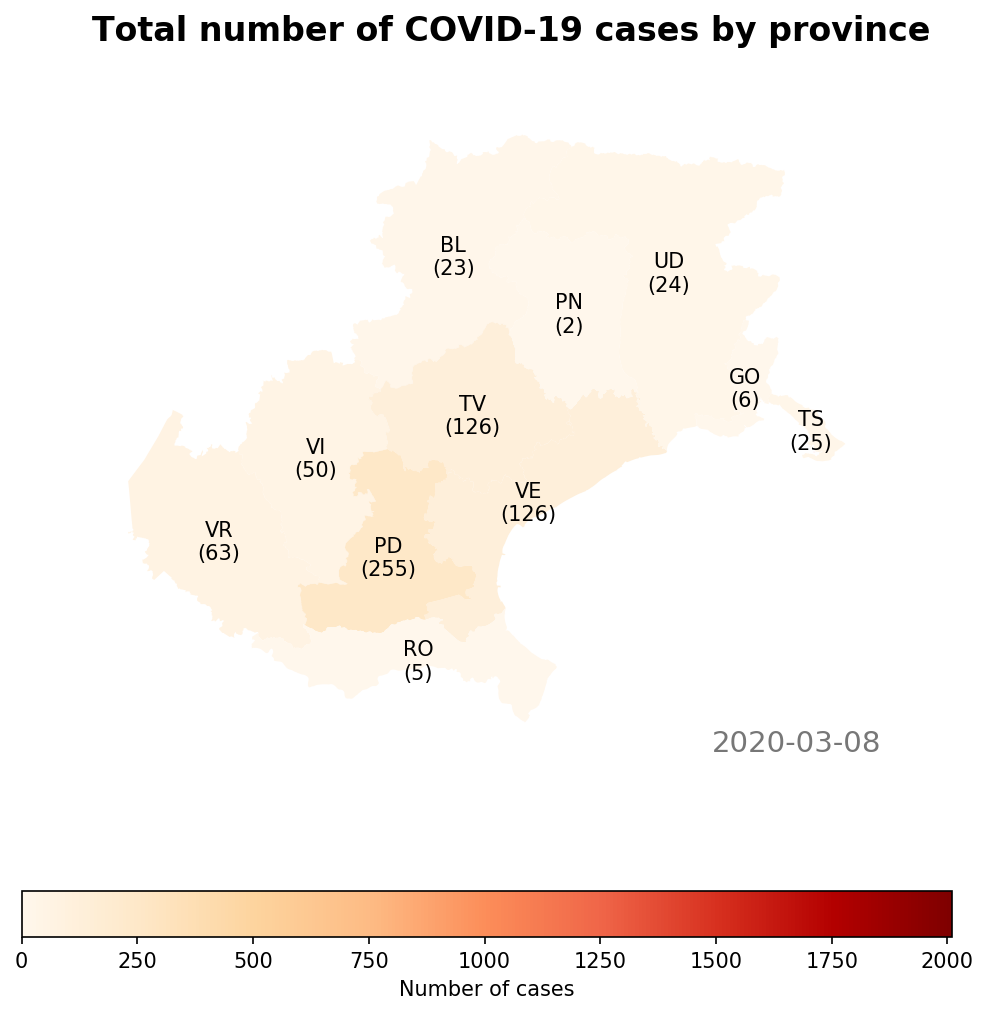

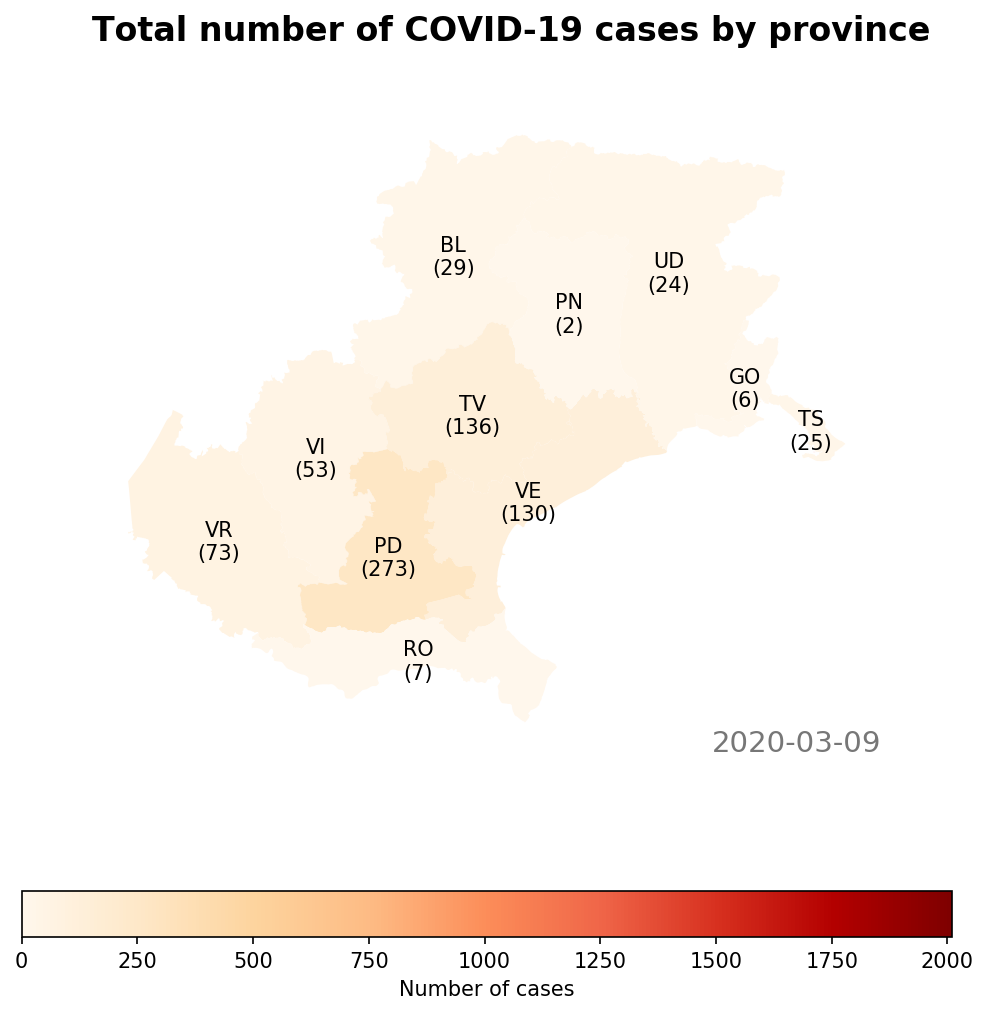

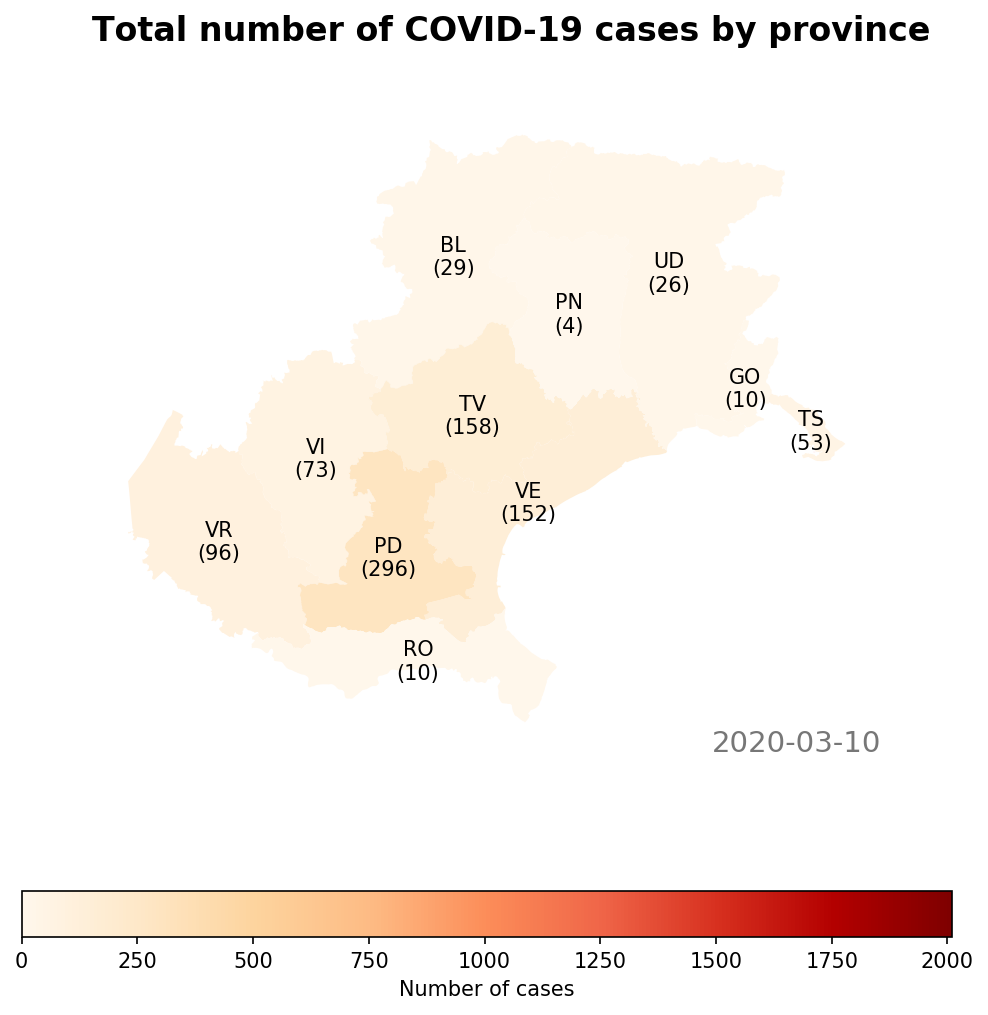

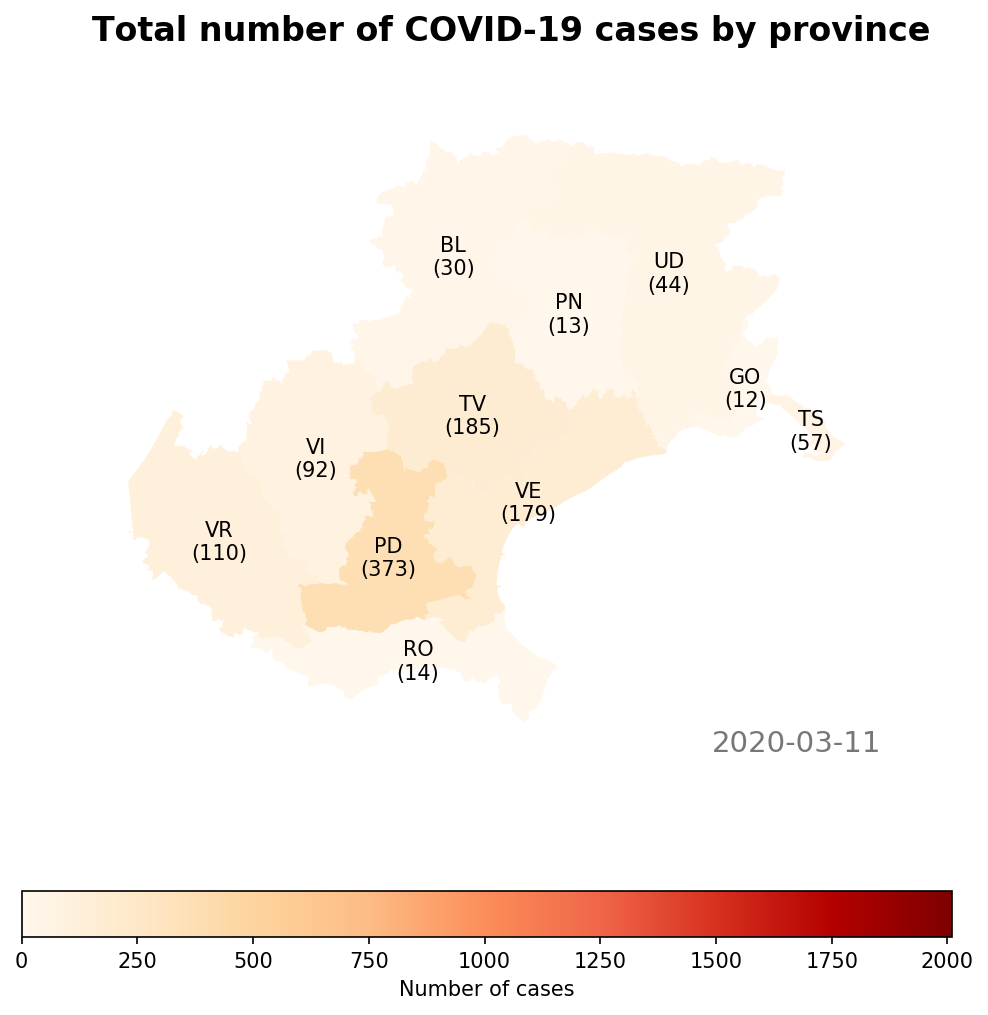

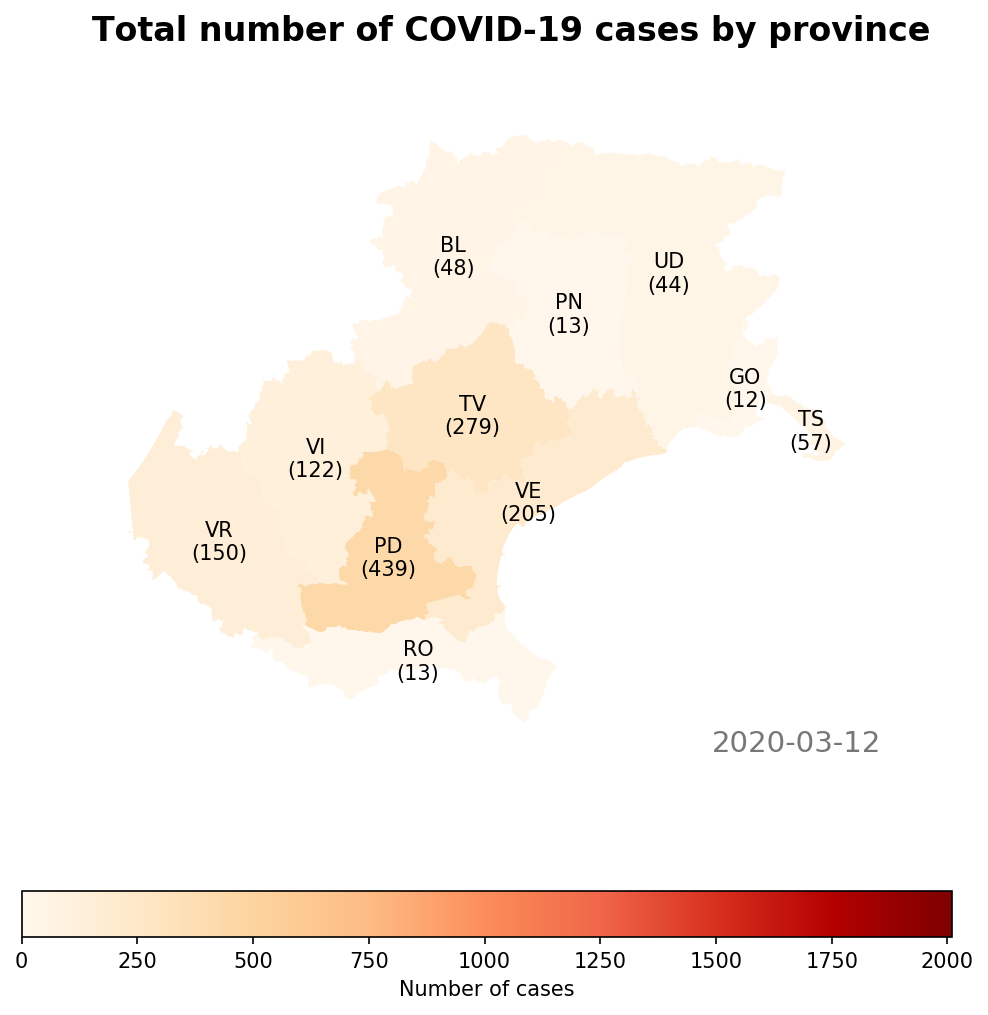

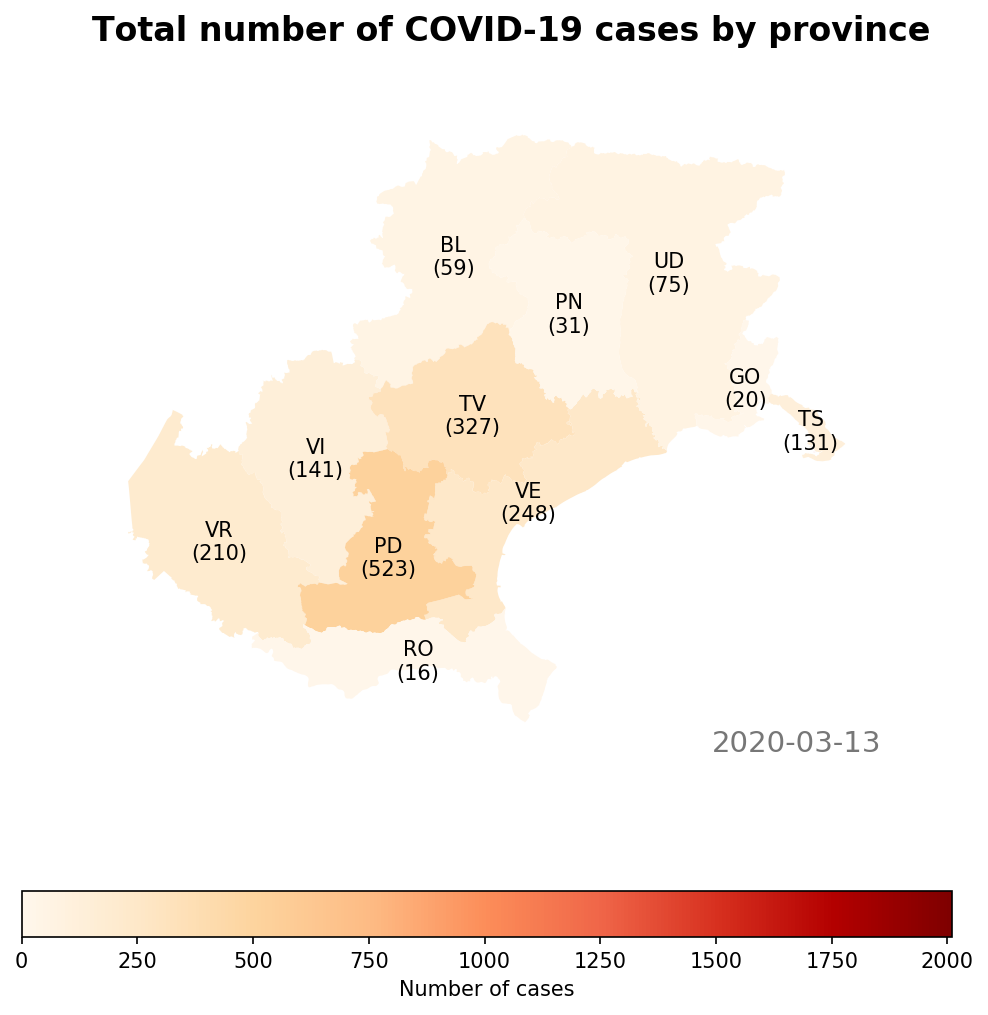

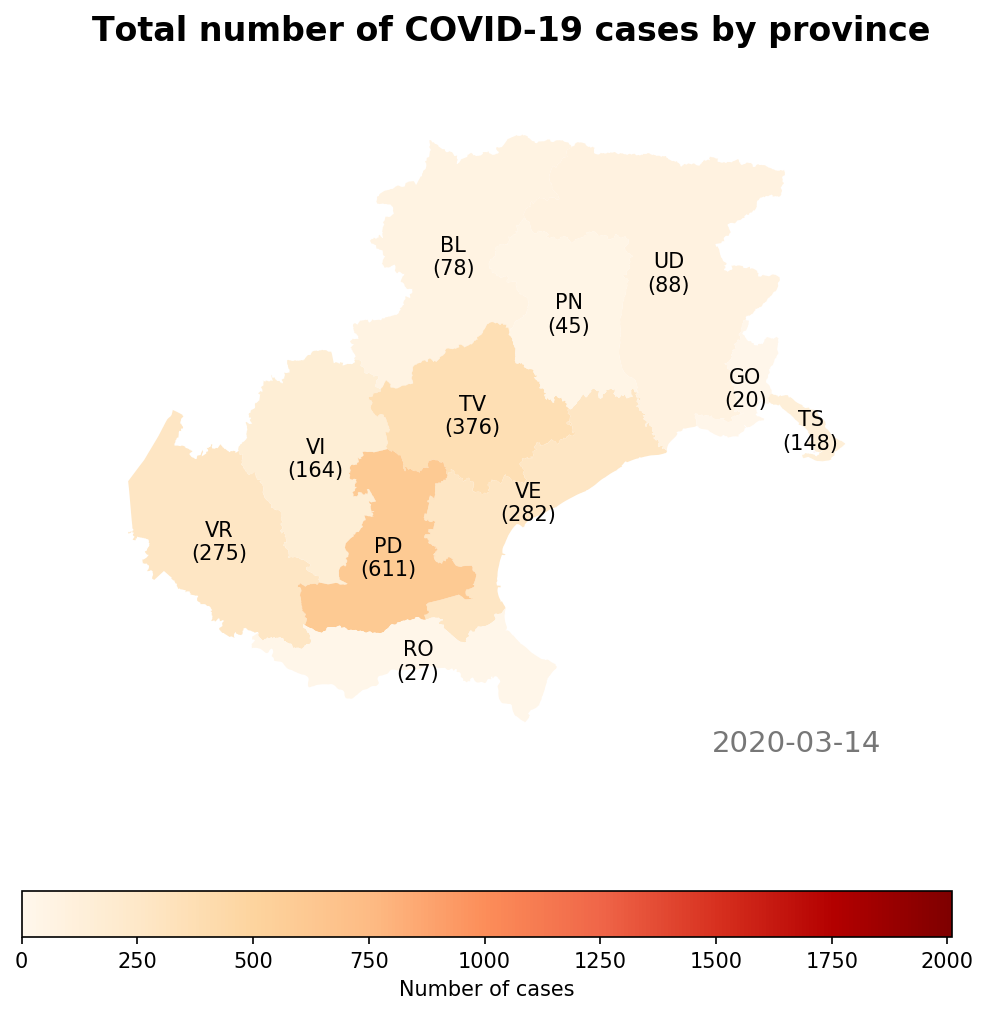

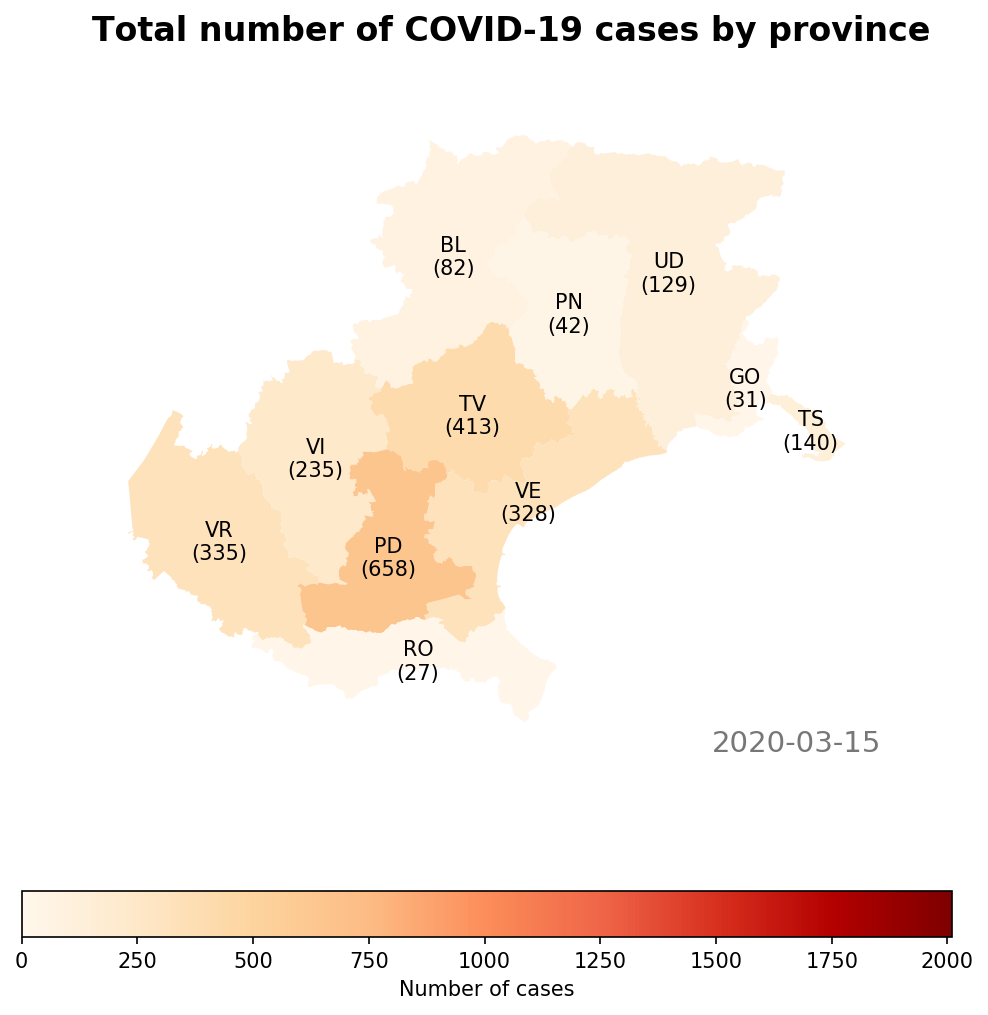

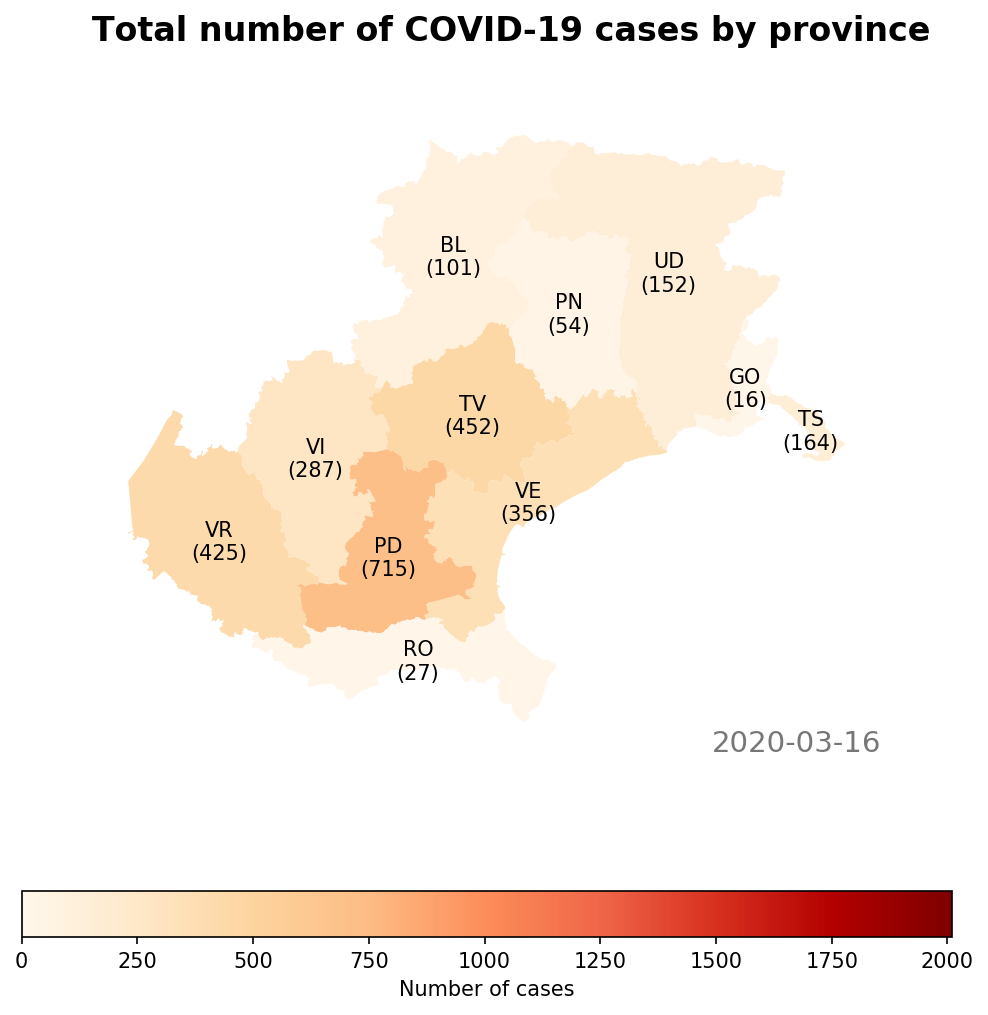

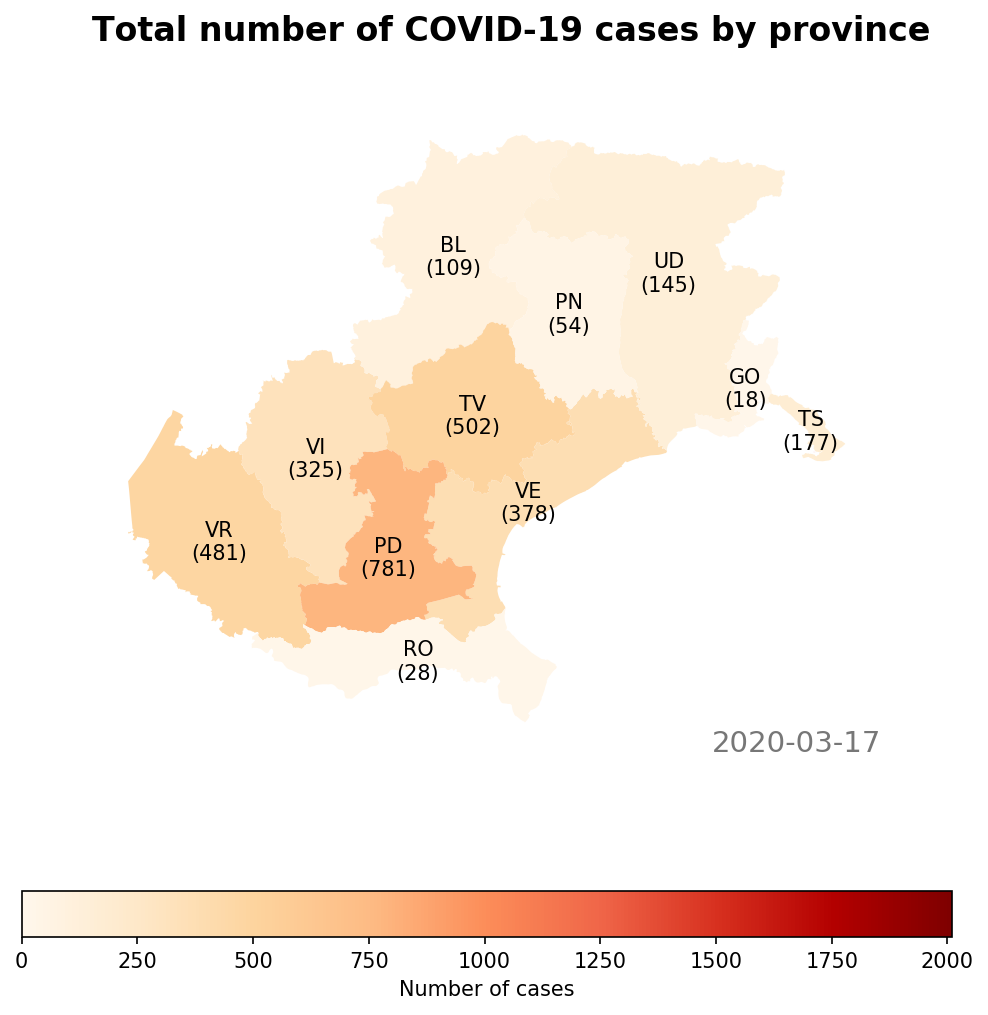

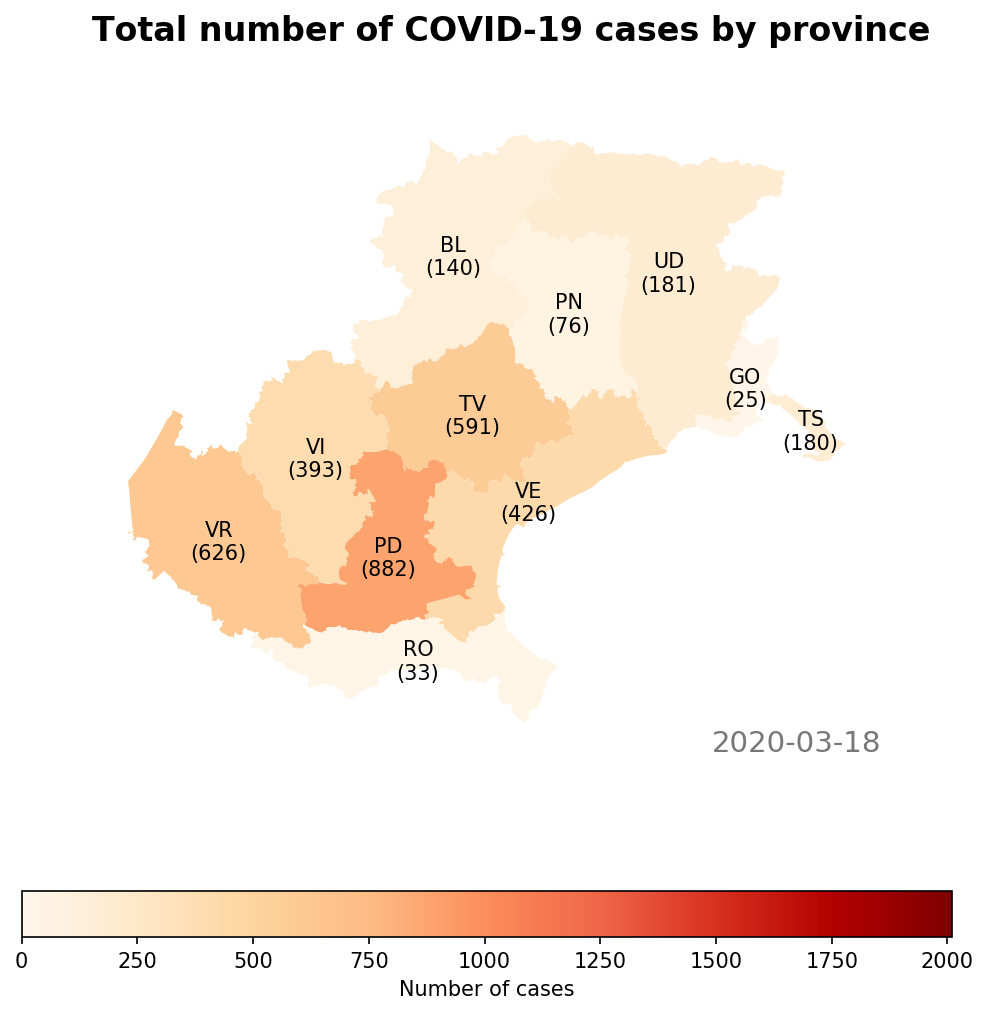

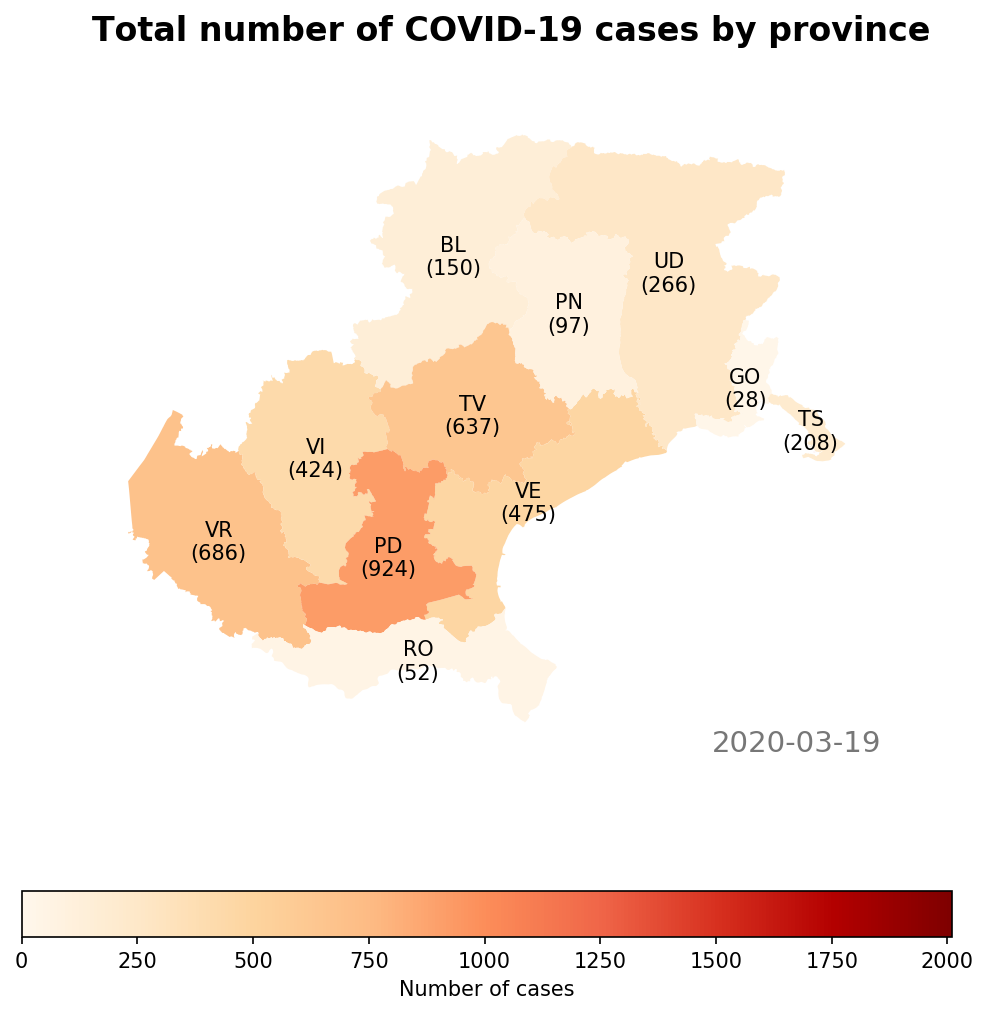

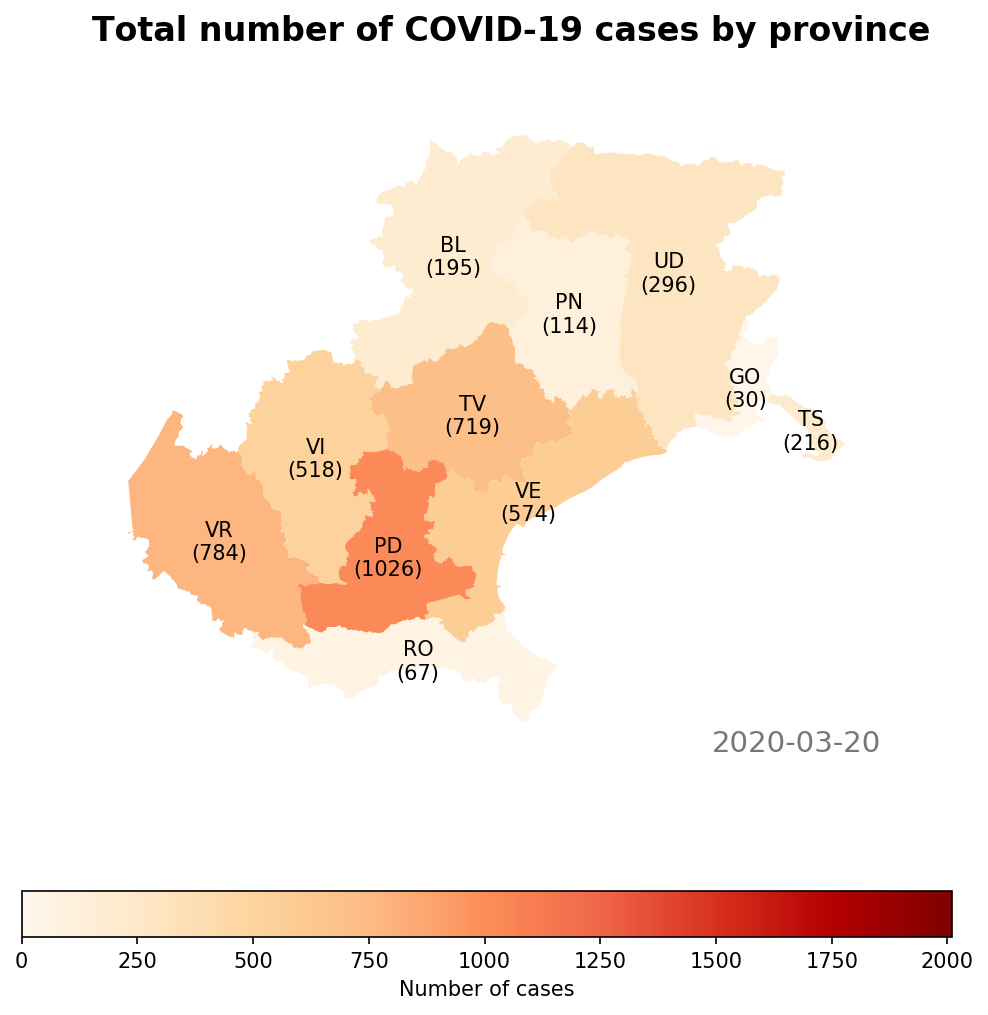

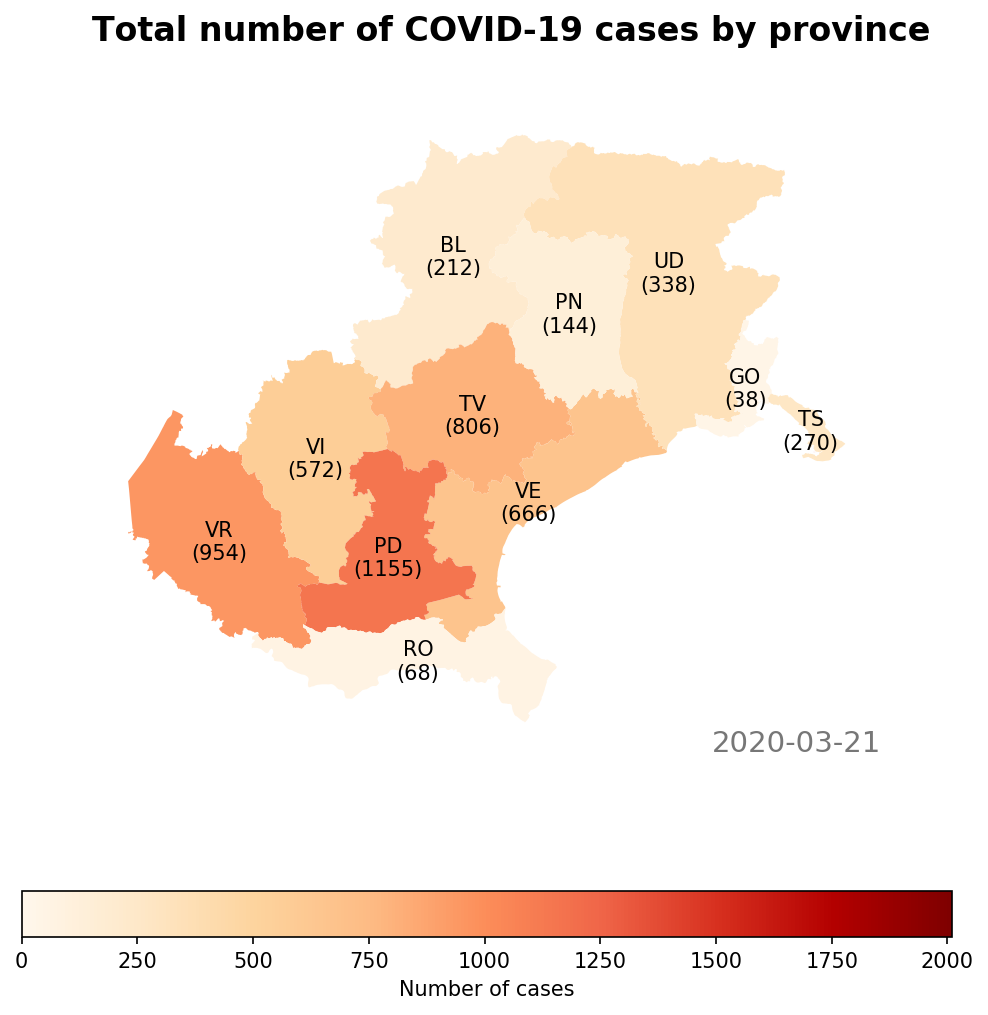

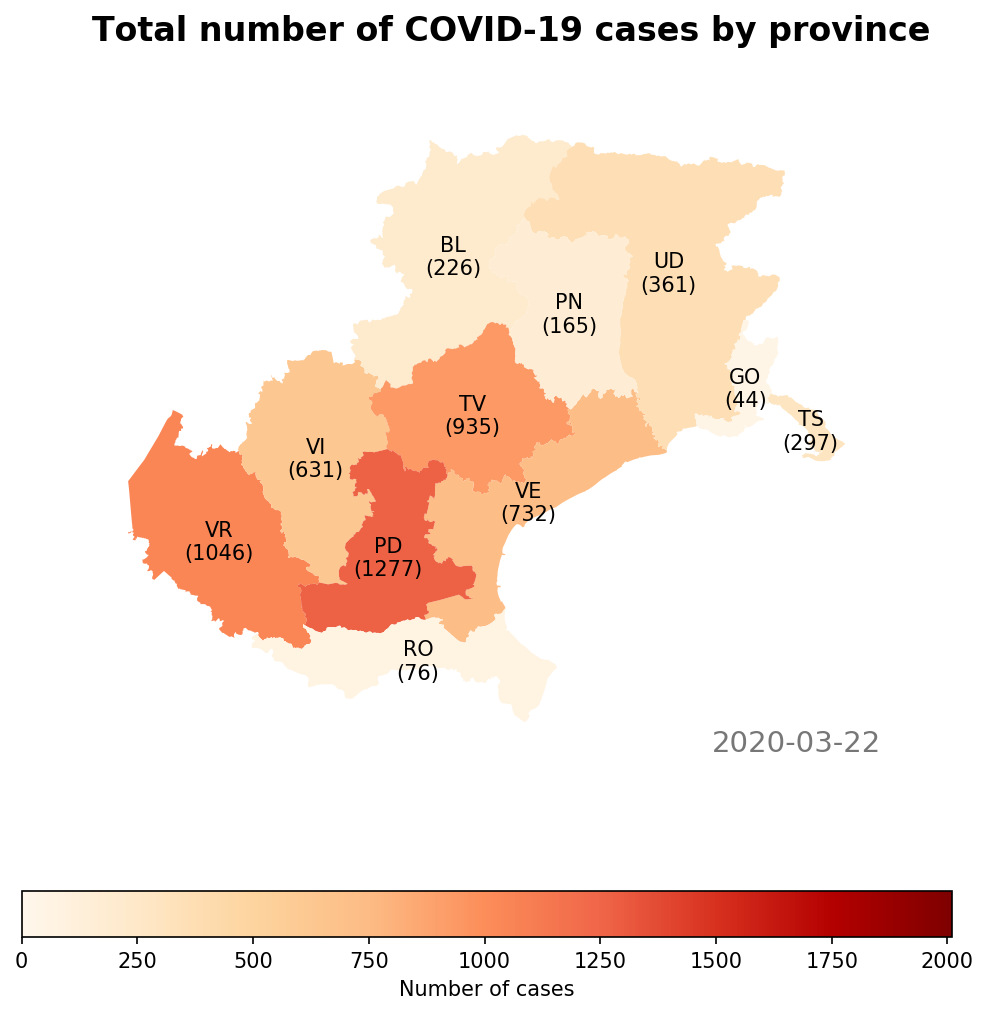

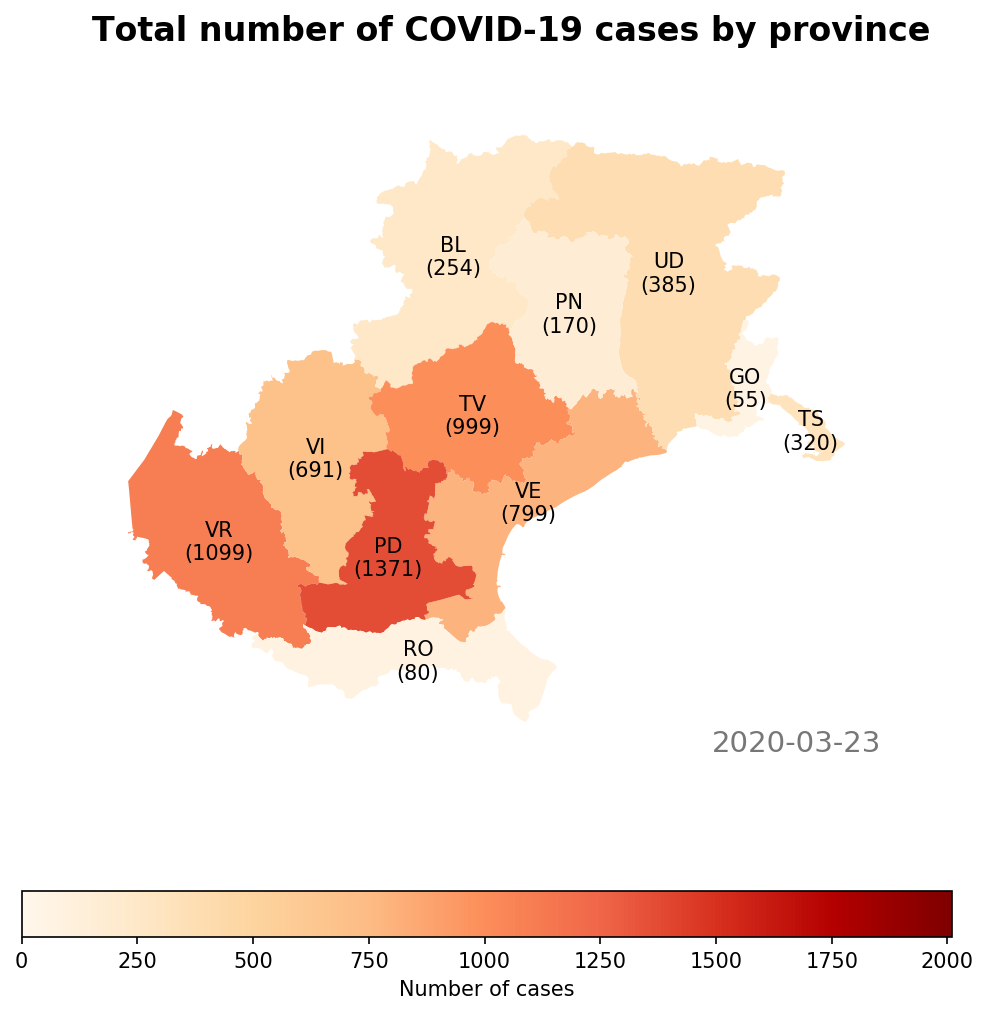

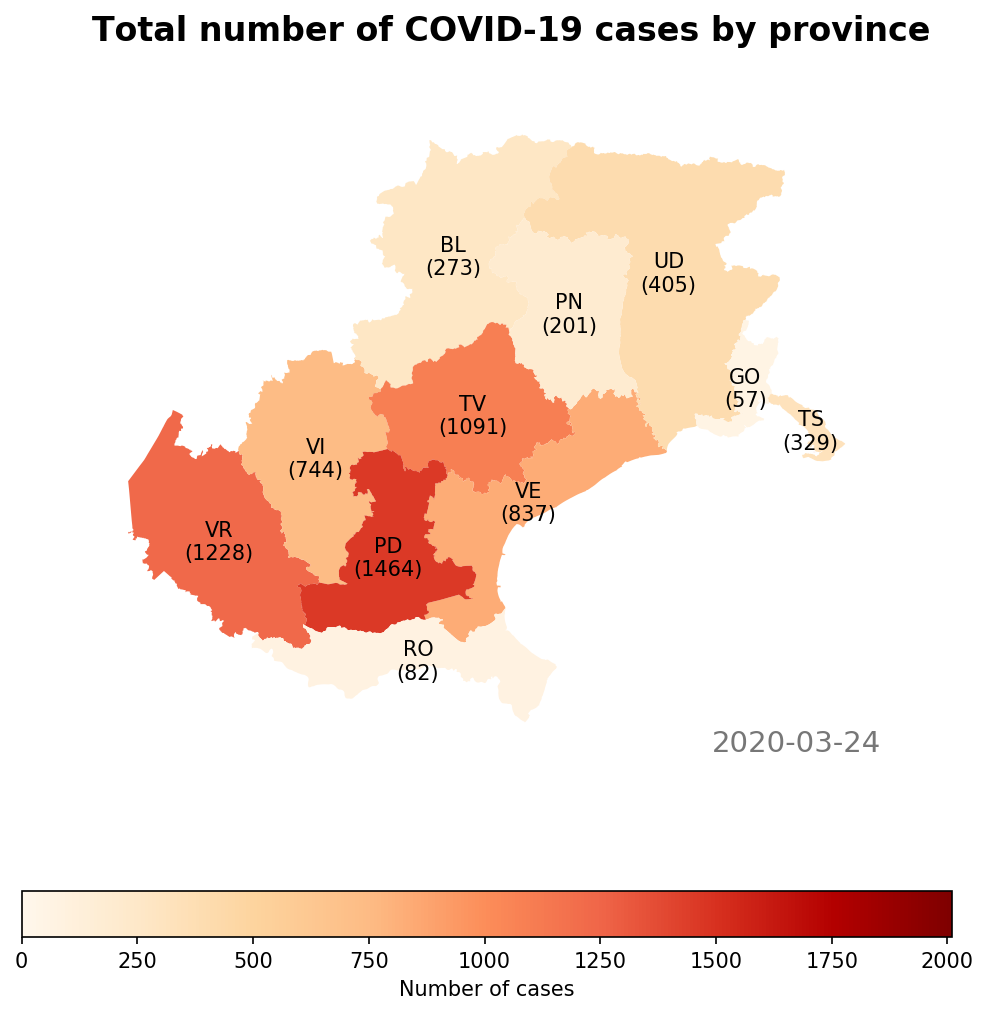

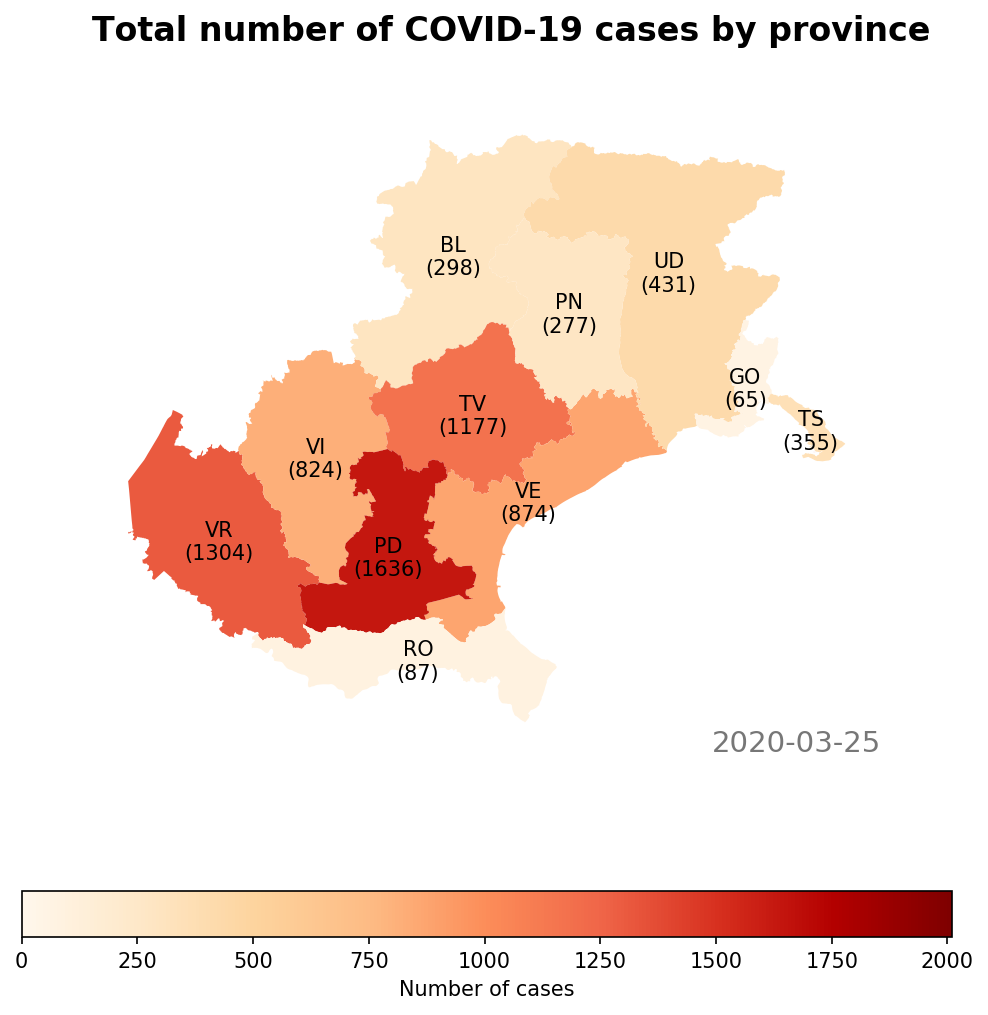

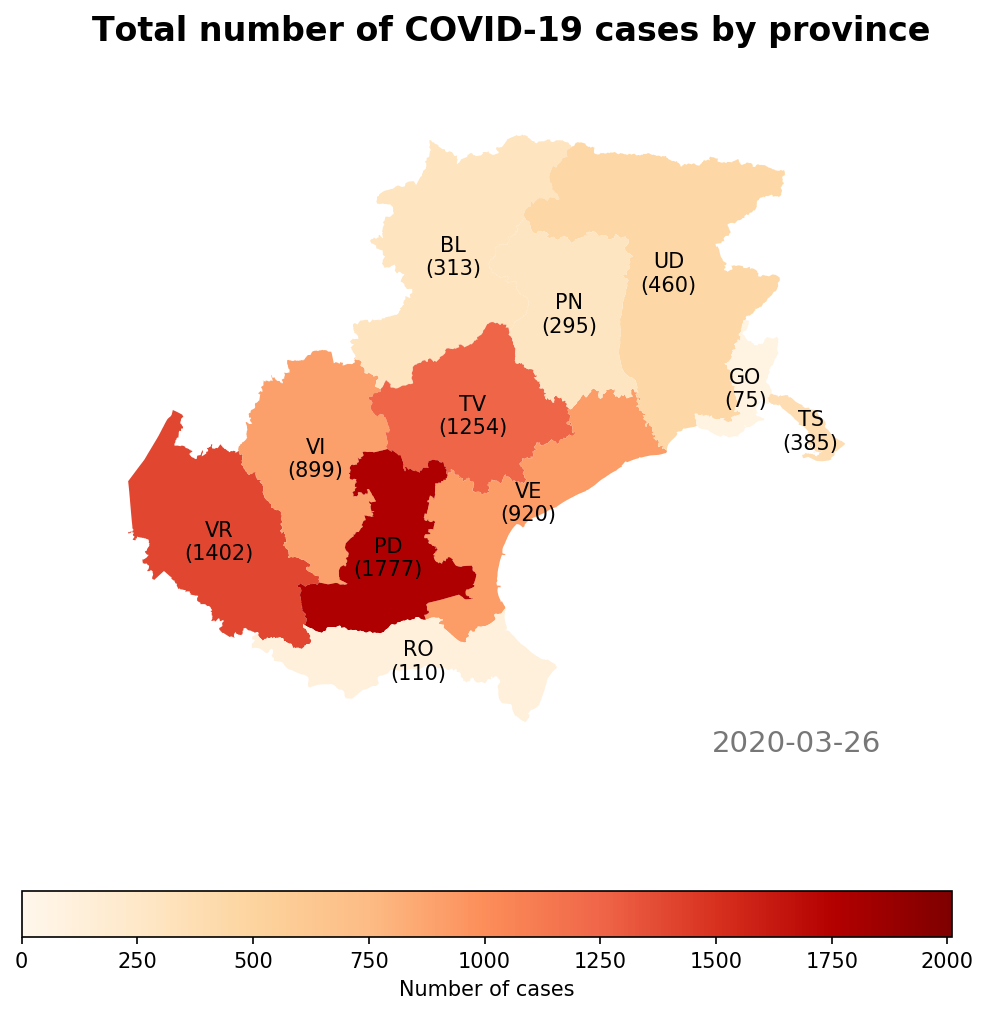

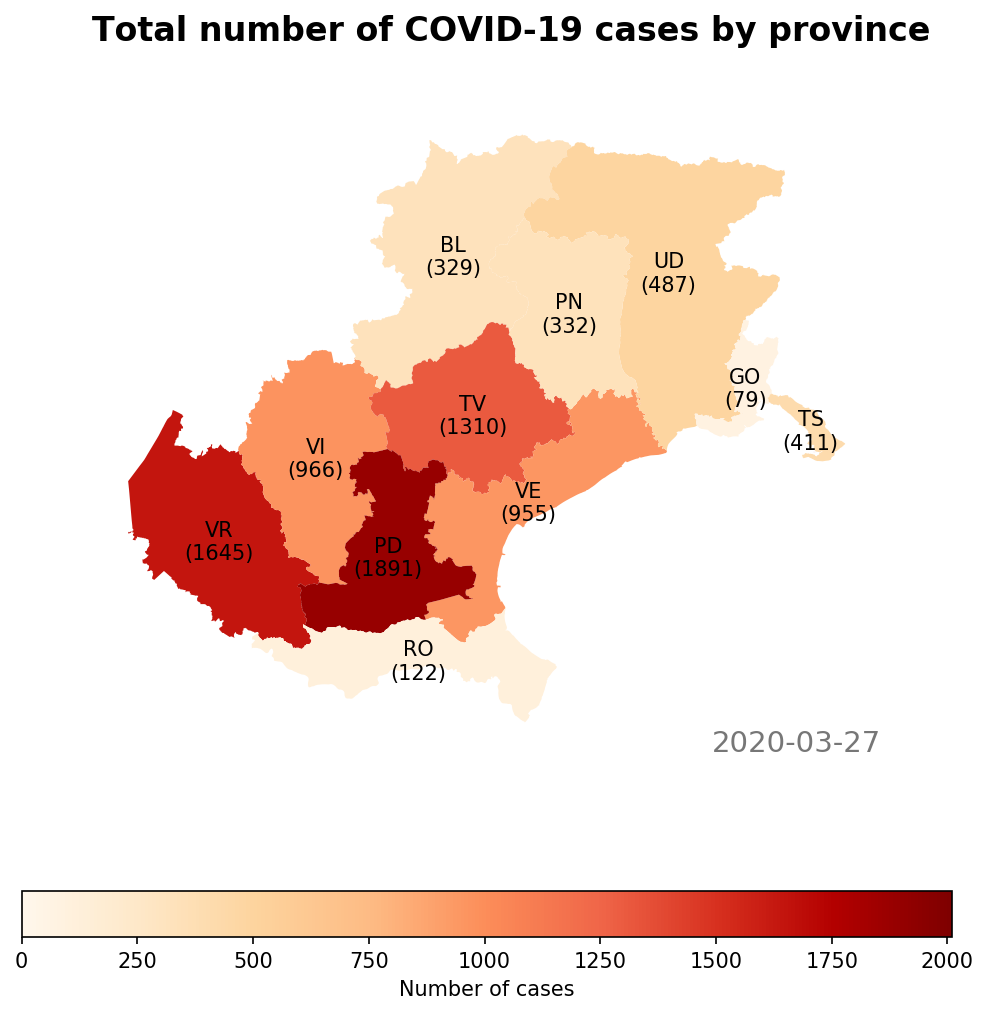

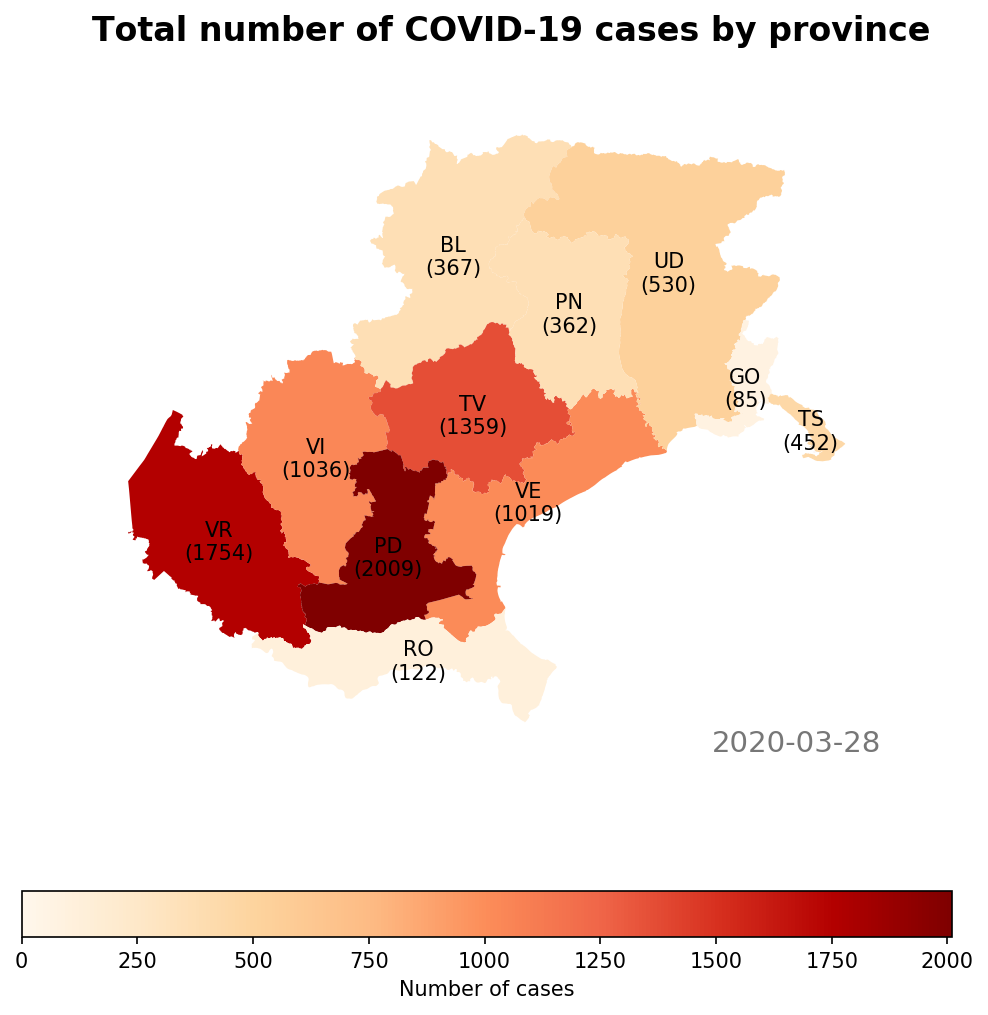

In [4]:
import imageio
with imageio.get_writer(here(f'./reports/province_map/movie.gif'), mode='I', duration=1.0) as writer:
    for date in prov_df.data.unique()[1:]:
        fname = here(f'./reports/province_map/{str(date)[:10]}.png')
        draw_geospatial_distribution(date, save_to_file=fname)
        image = imageio.imread(fname)
        writer.append_data(image)
        
    for _ in range(5):
        writer.append_data(image)

